In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import pyarrow.parquet as pq
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from socket import gethostname

In [2]:
hostname = gethostname()

In [3]:
hostname

'DESKTOP-8MD25QF'

In [4]:
path = "F:\Study\GeorgiaTech\Practicum\data" if hostname == "DESKTOP-8MD25QF" else r"C:\Users\kk_kr\Downloads" 
#path = r"rC:\Users\kk_kr\Downloads" 
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['20211207_ad06_GATECH.parquet',
 '20211207_brincl_GATECH.parquet',
 '20211207_zmat_GATECH.parquet',
 'Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx',
 'GA_Tech_data_columns.txt',
 '~$Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx']

In [5]:
report_path = path + "\\Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx"

In [6]:
report_data = pd.read_excel(report_path)

In [7]:
report_data

,Dealer Name,Sales Order,SR#,Customer Calculation,Sales Order item,Reporting Plant,Replacement SO,Value Stream / Vendor,Quality Treatment,Cause Code Concat,...,Work Center/Resource,Workcenter Text,Zparcmatl___T,Zsalesdoc__Zasdarea___T,Zsalesdoc__Zavparea___T,Days to Ship,FedEx Defect Qty,FedEx DPPM,FedEx Pieces Shipped,Net Value of Order Item
0,Interior Workplace Solutions Llc,7905468,800277284,Lehigh Valley Health Network Inc.,10,Kentwood Seating,7935627,SERIES 1,PRODUCT QUALITY,PD05 - Concealed Damage,...,S200000,SERIES ONE CELL,SHIPPING UNIT - SERIES ONE TASK CHAIR,Mid Atlantic North America,Americas East,20,NaN,NaN,NaN,0
1,Business Furnishings (sask) Ltd,7944156,800303304,Conexus Credit Union 2006,30,Athens Plant,8158198,GROW,PRODUCT QUALITY,2250 - Finish Coverage,...,AWESTELM,ATP WEST ELM,Linear C Table,Canada,Americas North,150,NaN,NaN,NaN,0
2,Not Assigned,7884621,800286322,Amq Scal Warehouse *,10,AMEX Plant,8004688,DA-505,PRODUCT QUALITY,2250 - Finish Coverage,...,DA-505,ATP CURRENCY DUO,"Worksurface (59.75""W x 30""D x 1""H)",West Coast North America,Americas West,137,NaN,NaN,NaN,0
3,Dancker,8349739,800337880,The Trustees Of Princeton University,10,AMEX Plant,8389452,DA-960-P,PRODUCT QUALITY,2255 - Mfg Visual Defects,...,DA-960-P,MPO KNIFE EDGE TABLES,"WORKSURFACE-TBL,MTG,12-14 PPL,RCT,47,CTR",New York-New Jersey,Americas North,7,NaN,NaN,NaN,0
4,K B M Office Equipment Inc,7926139,800300599,Alphabet Inc.,70,Finished Goods,8245814,GENESIS SEATING INC,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,GOOGLE OB AIR-45-US-HIGH SQUARE OPENING,West Coast North America,Americas West,10,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38884,Tangram,8152172,800323200,Irvine Ranch Water District Inc,20,Finished Goods,NaN,BOLD COMPANIES INC,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,"COALESSE-DENIZEN TOWER 6-CUBE, 52",West Coast North America,Americas West,43,NaN,NaN,NaN,0
38885,Forward Space Llc,8260635,800333159,Baxter Credit Union,450,Finished Goods,8358857,WOODLORE INTERNATIONAL INC,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,"STOR, 18D X 30W X 21H, BOXFILE",Central North America,Americas Central,7,NaN,NaN,NaN,0
38886,One Workplace,8117928,800323781,Kaiser Foundation Health Plan Inc.,100,Finished Goods,8280381,G A RICHARDS CO,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,"TABLE ASSY - FREESTANDING,HIGH,15.75Dx24",West Coast North America,Americas West,14,NaN,NaN,NaN,0
38887,Nbs Commercial Interiors,8323376,800335935,State Of Michigan,2780,AMEX Plant,8376701,DA-502,PRODUCT QUALITY,PD5D - Concealed Damage - Deliver,...,DA-502,ATP CURRENCY TOPS,"SPL CABINET - TWR,24W,OPEN,3 ADJ",Midwest North America,Americas East,3,NaN,NaN,NaN,0


In [8]:
problemText = report_data[report_data['Value Stream / Vendor']=='Components']
problemText  = problemText[problemText['Dealer Problem Statement'].notna()]['Dealer Problem Statement'].values
problemText = list(problemText)
len(problemText)


3728

In [25]:
wordlist = []
for j in problemText:
    wordlist += [i for i in re.split(r"[-;,.\s]\s*",j) if len(i) > 3]
text = ' '.join([i for i in wordlist])
text

'SKIN MAKERBOARD ARRIVED WITH DIFFERENT SIZE RECEIVED FULL POST LINE TYPE) INSTEAD POST CANNOT PROPERLY ASSEMBLE PHOTO PLEASE ADVISE HAVE ADDITIONAL BASE PLATES RECEIVED 36"W NEEDED 30"W ADDITIONAL BASE PLATES NEEDED THANKS HELLO TEAM JUNCTION ENDS ARRIVED WRONG MEASUREMENT THEY WERE SUPPOSED THEY THEY SHORT THEREFOR NEED HAVE THEM REPLACED PLEASE THANK PAINT HORIZONTAL PACKAGE NEED REPLACEMENT ASAP PROJECT MANAGER SENT ATTACHED PICS DOING THIS INSTALL TODAY SAID LOOKS LIKE TRIMSWERE MANUFACTURED INCORRECTLY BOTTOM CLIP TABLES CONTROL MODULE WORKING (SERV PART 1298401001SR) TABLE CONTROLLER WORKING (SERV PART 1298394001SR) TABLE CABLE POWER RECEIVED (SERV PART 22047321SR RUNS FLUSH FRAME DAMAGED PANEL MISSING SECTION POLES ATTACHED IMAGES ADVISE REPLACEMENT PART NUMBER THANKS HAVE CORRECT QUANTITY TRIM PIECES HAVE INILINE CONNECTORS THAT SHOULD CONNECTORS SURE WHICH LINE ERROR NEED THESE TRIMS WERE MADE WITH ATTACHMENT CLIPS WRONG POSITIONS CANNOT ATTACH NEED TRIM METAL DENTS JUNCTION 

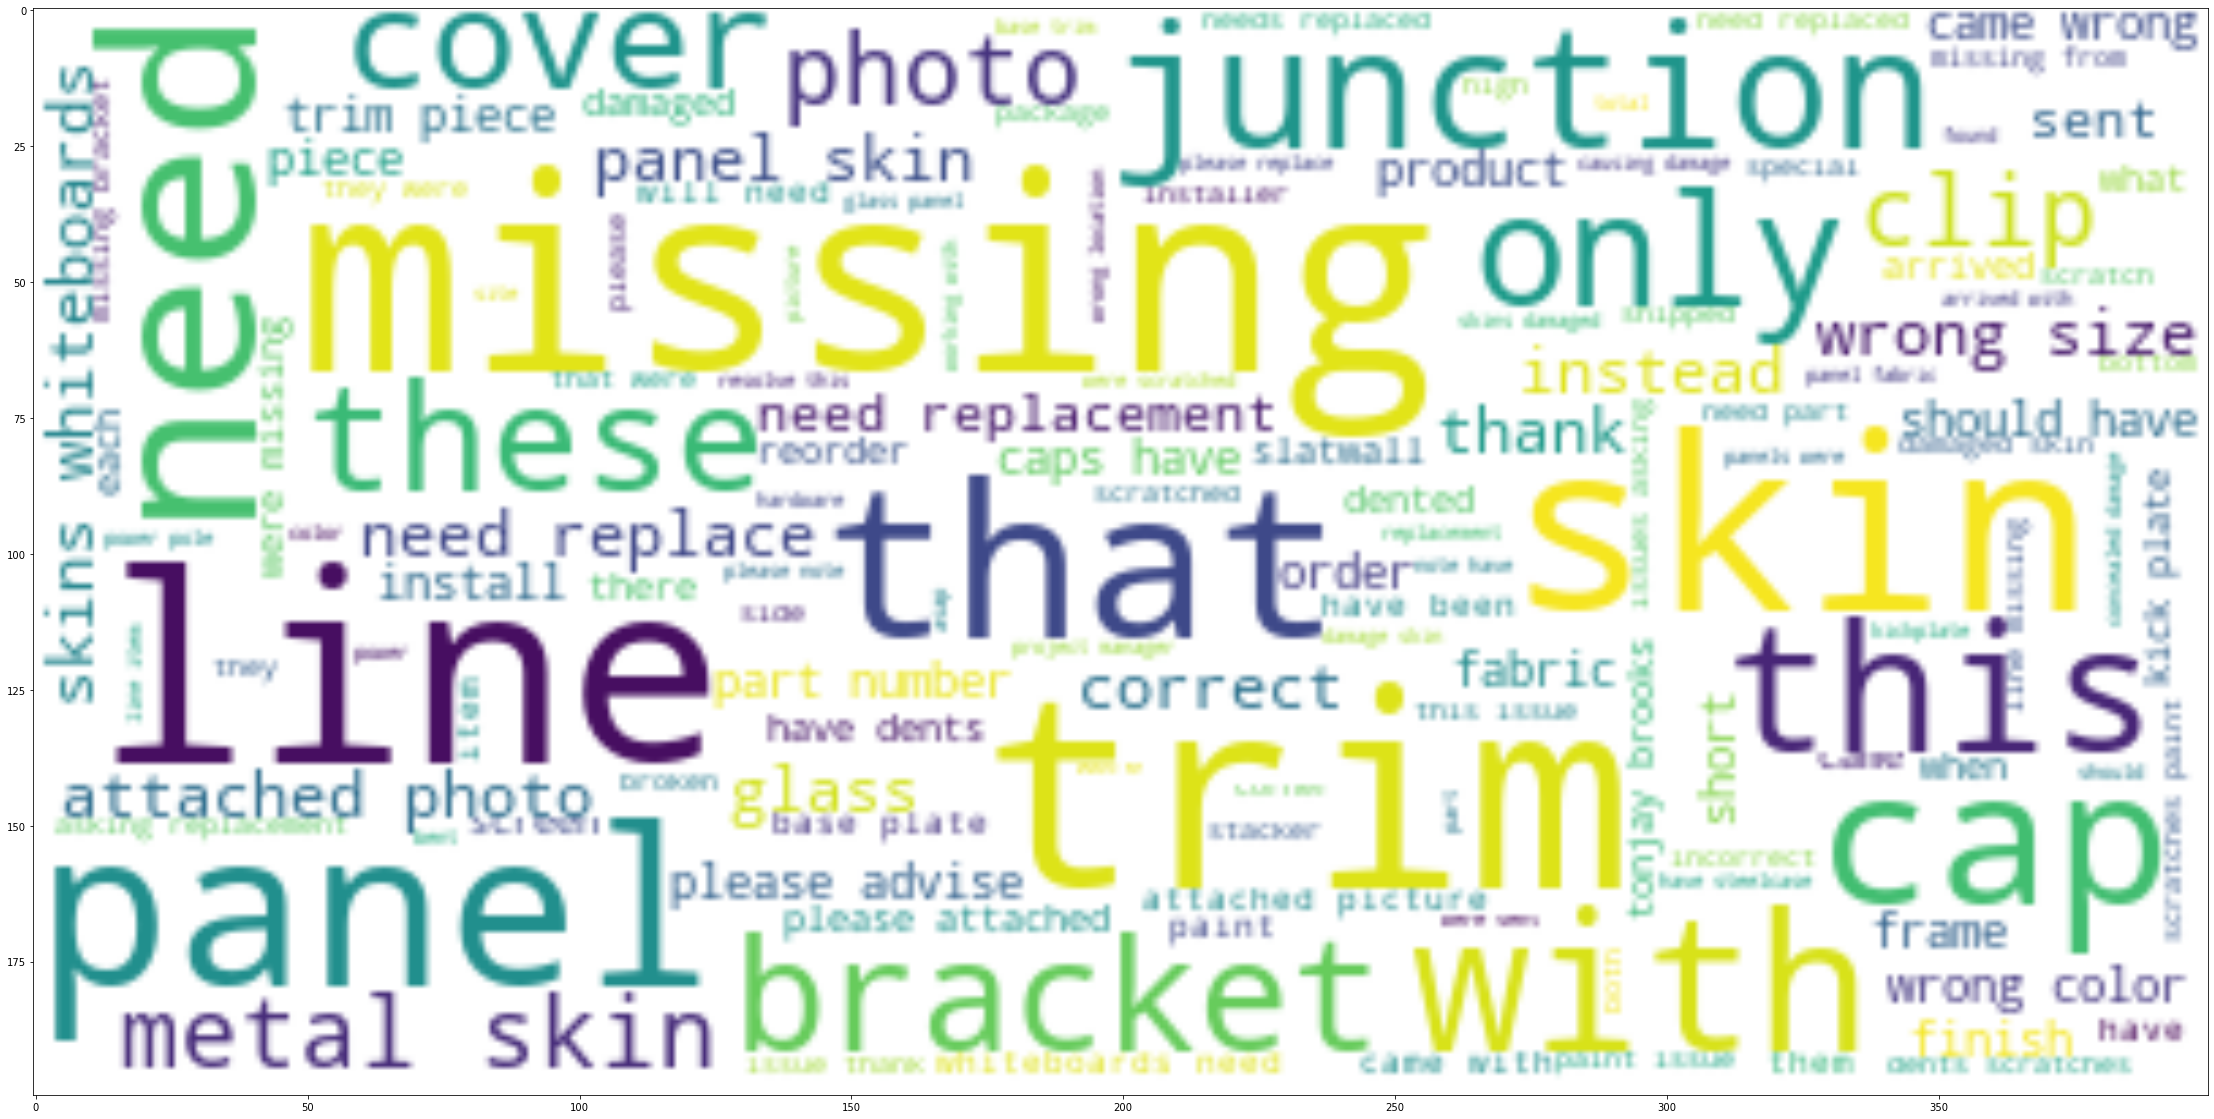

In [34]:
problemText = report_data[report_data['Value Stream / Vendor']=='Components']
problemText  = problemText[problemText['Dealer Problem Statement'].notna()]['Dealer Problem Statement'].values
problemText = list(problemText)
wordlist = []
for j in problemText:
    wordlist += [i for i in re.split(r"[-;,.\s]\s*",j) if len(i) > 3]
text =  ' '.join([i for i in wordlist])
text = text.lower()
exclude = ['DONT','ORDERED','received']    
wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=1000,background_color="white").generate(text)
#tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
#print(tweets.to_string(index=False))
#plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
fix,ax=plt.subplots(nrows=1,ncols=1,figsize=(60,20))
#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")

NameError: name 'labels' is not defined

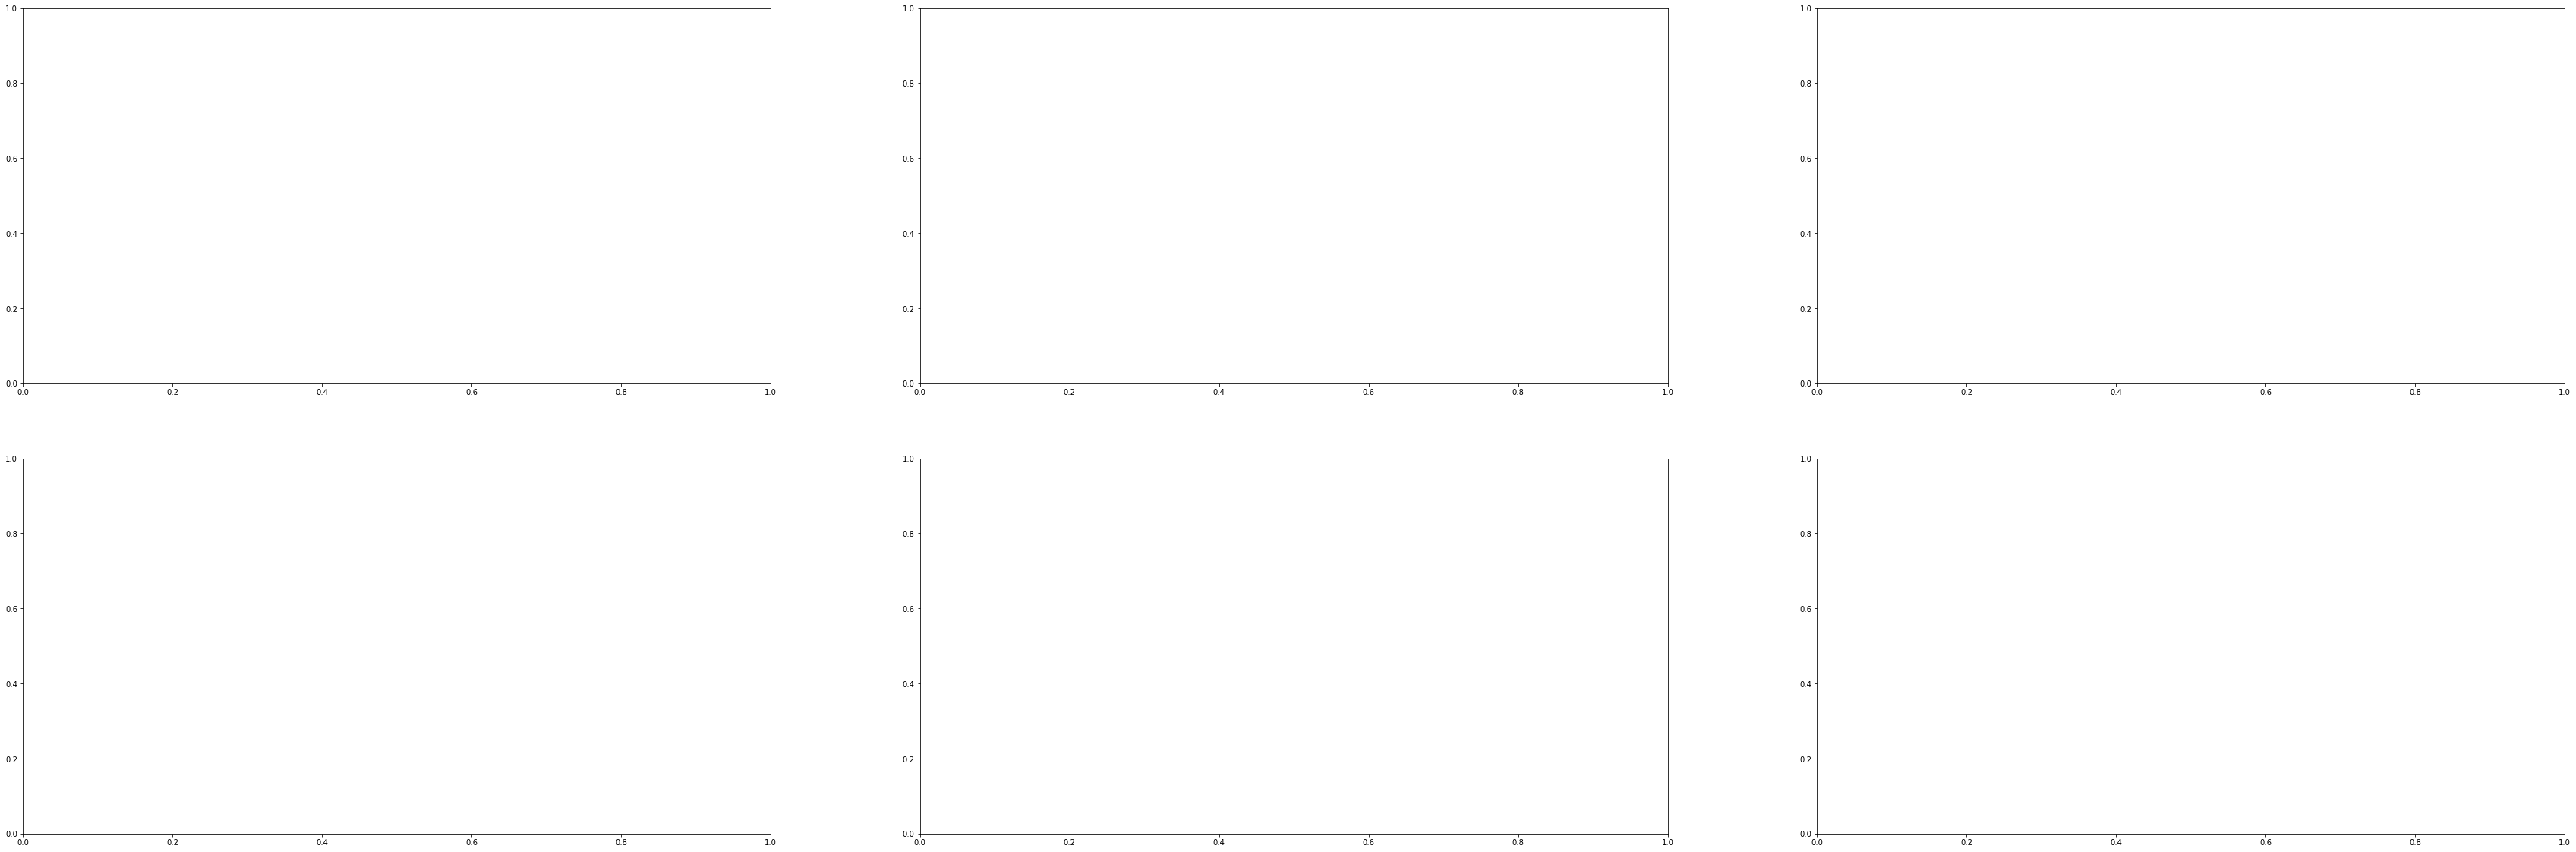

In [17]:
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(60,20))
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
#   print("\n printing S",s)
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that','cocacola','coca','cola']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    #print('Cluster: {}'.format(k))
    #print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    #print(tweets.to_string(index=False))
    plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()

In [3]:
ad06_path = path + "\\20211207_ad06_GATECH.parquet"
brincl_path = path + "\\20211207_brincl_GATECH.parquet"
zmat_path = path + "\\20211207_zmat_GATECH.parquet"

In [7]:
ad06_df = pd.read_parquet(ad06_path)

In [4]:
brincl_df = pd.read_parquet(brincl_path)
zmat_df = pd.read_parquet(zmat_path)

In [8]:
len(brincl_df), len(zmat_df), len(ad06_df)

(3332109, 2235788, 7606138)

In [12]:
brincl_df.info(memory_usage="deep")
zmat_df.info(memory_usage="deep")
ad06_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332109 entries, 0 to 3332108
Data columns (total 24 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   ZSALESDOC              object
 1   0S_ORD_ITEM            object
 2   BR_ZSITE_SC_MRG        object
 3   BR_ZSITE_SC_ZSITETYPE  object
 4   ZVSEGMENT              object
 5   BR_ZQTTHENST_ULT       object
 6   BR_ZMKTZIP_MKTAREA     object
 7   ZMKTZIP                object
 8   0GI_DATE               object
 9   0INVOICEDAT            object
 10  0PSTNG_DATE            object
 11  ZERDAT                 object
 12  ZPLANGI                object
 13  BR_ZMATL_ZPRDHIER1     object
 14  ZPRDHIER2              object
 15  BR_ZMATL_ZPRDHIER3     object
 16  BR_ZMATL_ZPRDHIER4     object
 17  BR_ZMATL_ZPRDHIER5     object
 18  BR_ZMATL_ZPRDHIER6     object
 19  BR_ZMATL_ZPRDHIER9     object
 20  BR_ZMATL_ZPRDHIER10    object
 21  BR_ZMATL_ZPRDHIER11    object
 22  BR_ZMATL_ZPRDHIER12    object
 23  ZMATLGR

In [13]:
brincl_df.info(memory_usage="True")
zmat_df.info(memory_usage="True")
ad06_df.info(memory_usage="True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332109 entries, 0 to 3332108
Data columns (total 24 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   ZSALESDOC              object
 1   0S_ORD_ITEM            object
 2   BR_ZSITE_SC_MRG        object
 3   BR_ZSITE_SC_ZSITETYPE  object
 4   ZVSEGMENT              object
 5   BR_ZQTTHENST_ULT       object
 6   BR_ZMKTZIP_MKTAREA     object
 7   ZMKTZIP                object
 8   0GI_DATE               object
 9   0INVOICEDAT            object
 10  0PSTNG_DATE            object
 11  ZERDAT                 object
 12  ZPLANGI                object
 13  BR_ZMATL_ZPRDHIER1     object
 14  ZPRDHIER2              object
 15  BR_ZMATL_ZPRDHIER3     object
 16  BR_ZMATL_ZPRDHIER4     object
 17  BR_ZMATL_ZPRDHIER5     object
 18  BR_ZMATL_ZPRDHIER6     object
 19  BR_ZMATL_ZPRDHIER9     object
 20  BR_ZMATL_ZPRDHIER10    object
 21  BR_ZMATL_ZPRDHIER11    object
 22  BR_ZMATL_ZPRDHIER12    object
 23  ZMATLGR

In [9]:
zmat_df.head(10)

,0BASE_UOM,0CREATEDON,0DIVISION,0FISCVARNT,0IND_SECTOR,0MATL_TYPE,0MATL_TYPE___T,0MAT_KONDM,0SOURSYSTEM,0UNIT_OF_WT,...,dealer_ancillary_cd,dealer_ancillary_dsc,ZPRDLCYCL,ZPRODGRP,ZPRODGRP1,ZPRODGRP2,ZPRODGRP3,ZSRVPART,ZUNSPSC,ZZFIRSTOE
0,ST,20020722,01,SC,M,HIBE,Operating supplies,,NA,,...,,None,,,,,,N,,00000000
1,ST,20091007,01,SC,M,FERT,Finished product,01,NA,LB,...,Y,Yes,,,,,,Y,,00000000
2,ST,20020308,01,SC,M,HALB,Semi-finished product,,NA,LB,...,A,No,,,,,,N,,00000000
3,ST,20191023,01,SC,M,HALB,Semi-finished product,,NA,LB,...,,None,,,,,,N,,00000000
4,ST,20020813,01,SC,M,FERT,Finished product,01,NA,LB,...,F,No,,,,,,N,,00000000
5,ST,20080328,01,SC,M,HALB,Semi-finished product,,NA,LB,...,,None,,,,,,N,,00000000
6,ST,20030204,,SC,M,ZCOM,Commercial Model,,NA,LB,...,,None,,,,,,N,,00000000
7,IN,19990202,01,SC,M,HALB,Semi-finished product,,NA,LB,...,,None,,,,,,N,,00000000
8,ST,20200305,01,SC,M,FERT,Finished product,01,NA,LB,...,,None,,,,,,N,,00000000
9,ST,20210401,01,SC,M,FERT,Finished product,,NA,LB,...,,None,,,,,,N,,00000000


In [17]:
parquet_file = pq.ParquetFile(brincl_path)

ArrowInvalid: Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [18]:
ad06_df.describe()

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
count,7606138,7606138,7606138,7606138,7606138,7606138,7606138,7606138,7605142,7606138,...,7606138,7606138,7606138,7606138,7606138,7606138,7606138,7606138,7606138,7606138
unique,602988,9585,3390,23,22,582,920,3,2,1000,...,931,32,7550,2,273089,2016,271836,31582,49975,335307
top,0008379973,000010,000000,4000,Athens Plant,00000000,20201103,LB,Pound,001,...,00000000,C,,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
freq,3919,597726,3604686,2309629,2309629,445667,41110,7573525,7573525,1132025,...,1100264,4969601,791588,7408409,2697445,3303615,2753071,2697449,2856922,2856922


In [20]:
ad06_df.head(100)

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
0,0007227476,000010,000000,Z100,GR-Unsupported Products,00000000,20180625,LB,Pound,000,...,20180104,C,,,100.002000000000000000,2.000000000000000000,100.002000000000000000,120.002000000000000000,120.004000000000000000,100.004000000000000000
1,0007236281,000428,000390,5500,SC Wood Plant,20200710,20200602,LB,Pound,015,...,00000000,C,,,343.046000000000000000,22.000000000000000000,343.046000000000000000,64.592000000000000000,145.333000000000000000,391.232000000000000000
2,0007236284,000200,000190,8300,AMEX Plant,20210126,20180704,LB,Pound,009,...,20201005,C,16Z06806,,50.804000000000000000,1.000000000000000000,50.804000000000000000,0.001000000000000000,5.402000000000000000,57.436000000000000000
3,0007238833,000180,000000,8300,AMEX Plant,20201103,20180706,LB,Pound,002,...,20191206,,18Z02615,,0E-18,4.000000000000000000,0E-18,0E-18,0E-18,0E-18
4,0007238834,000350,000340,6000,Kentwood Plant,20201105,20200805,LB,Pound,015,...,00000000,C,18Z02615,,104.166000000000000000,2.000000000000000000,104.166000000000000000,0.002000000000000000,2.706000000000000000,107.826000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0007754533,000840,000000,4000,Athens Plant,20200611,20191014,LB,Pound,025,...,20200414,C,18Z05603,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
96,0007754533,001800,000000,8800,Finished Goods,20200610,20191014,LB,Pound,000,...,20200414,C,18Z05603,,34.200000000000000000,190.000000000000000000,34.200000000000000000,9.500000000000000000,1.305000000000000000,36.700000000000000000
97,0007755886,001140,000000,6000,Kentwood Plant,00000000,20191015,LB,Pound,032,...,20200312,C,14Z07530,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
98,0007757339,003070,003050,4000,Athens Plant,00000000,20191016,LB,Pound,132,...,20191126,C,19Z06922,X,1.705000000000000000,1.000000000000000000,1.705000000000000000,0.001000000000000000,0.251000000000000000,1.995000000000000000


In [21]:
ad06_df_samplerows = ad06_df.head(100)
ad06_df_samplerows.to_csv('ad06_df_samplerows.csv')

In [22]:
len(ad06_df)

7606138

In [28]:
ad06_df[ad06_df['4ZSD_AD06_VBELN'] == 800303304]

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
